In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

from sklearn.model_selection import train_test_split as tts

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Public Variables

In [192]:
num_class = 3
classes = ("functional", "functional needs repair","non-functional")

In [193]:
train_df = pd.read_csv("./datasets/merged_train.csv")
test_df = pd.read_csv("./datasets/test.csv")
submission_df = pd.read_csv("./datasets/SubmissionFormat.csv")

In [194]:
input_df = train_df.drop("status_group", axis=1)
output_df = train_df["status_group"]

In [195]:
print(input_df.shape)
print(output_df.shape)

(59400, 28)
(59400,)


### Split Dataset

In [196]:
input_train, input_test, output_train, output_test = tts(input_df, output_df, test_size=0.3)

## Train the Model

In [197]:
d_tree = RandomForestClassifier(max_depth=800)
d_tree.fit(input_train, output_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=800, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [198]:
predicted_output = d_tree.predict(input_test)

In [199]:
conf_matrix = confusion_matrix(output_test, predicted_output)

In [200]:
print(pd.DataFrame(conf_matrix))

0    1     2
0  8557  252   784
1   696  408   206
2  1492  120  5305


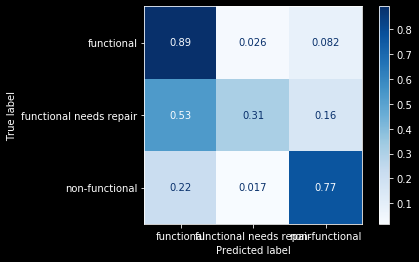

In [201]:
plot_conf_matrix = plot_confusion_matrix(d_tree, input_test, output_test, display_labels=classes, cmap=plt.cm.Blues, normalize='true')

In [202]:
classification_report = classification_report(output_test, predicted_output, output_dict=True)

In [203]:
class_report_df = pd.DataFrame(classification_report).transpose()

In [204]:
class_report_df

,precision,recall,f1-score,support
functional,0.796370,0.892005,0.841479,9593.000000
functional needs repair,0.523077,0.311450,0.390431,1310.000000
non functional,0.842732,0.766951,0.803058,6917.000000
accuracy,0.800786,0.800786,0.800786,0.800786
macro avg,0.720727,0.656802,0.678322,17820.000000
weighted avg,0.794276,0.800786,0.793408,17820.000000


In [205]:
test_predicitons = d_tree.predict(test_df)

In [206]:
test_predicitons

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [207]:
for (idx,data) in submission_df["status_group"].iteritems():
    submission_df["status_group"][idx] = test_predicitons[idx]

In [ ]:
submission_df.to_csv("./datasets/submission.csv", index=False, header=True)